In [2]:
import torch
from torch import nn
import numpy as np
import math
import sys
sys.path.append('..')
from myd2l import build_ax, show_trace_2d


In [3]:
def loss(x1, x2):
    return x1**2 + x2**2 + 0.2 * np.sin(2 * x1) + 0.2 * np.sin(2 * x2)

def grad(x1, x2):
    return 2 * x1 + 0.4 * np.cos(5 * x1), x2 + 0.4 * np.cos(5 * x2)

In [4]:
# GD

def train_gd(num_epochs, lr, x1, x2):
    losses = [loss(x1, x2)]
    results = [(x1, x2)]
    for epoch in range(num_epochs):
        g1, g2 = grad(x1, x2)
        x1 -= lr * g1
        x2 -= lr * g2
        results.append((x1, x2))
        losses.append(loss(x1,x2))
    
    print(f'epoch {epoch + 1:d}, loss {losses[-1]:.3f}, x1 {x1:.3f}, x2 {x2:.3f}')
    ax = build_ax('epoch', 'loss')
    ax.plot(range(num_epochs + 1), losses)
    show_trace_2d(results, loss)

epoch 6, loss -0.044, x1 -0.073, x2 -0.060


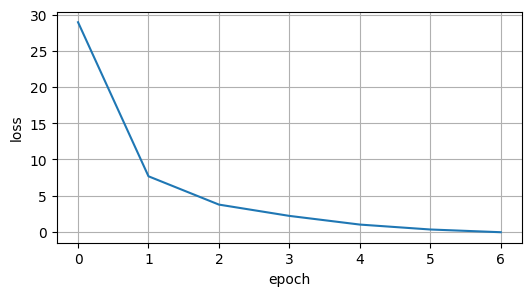

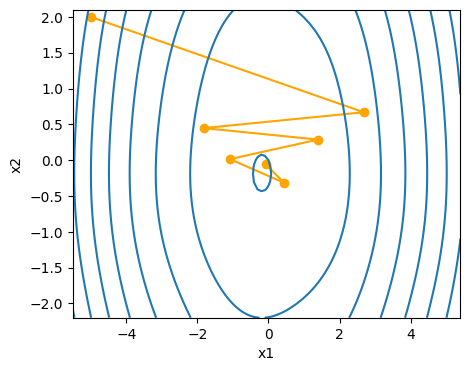

In [5]:
train_gd(6, 0.8, -5, 2)

In [6]:
# Momentum
# 使梯度不要转变的太快，更平滑

def train_mom(num_epochs, lr, belta, x1, x2):
    losses = [loss(x1, x2)]
    results = [(x1, x2)]
    v1, v2 = 0.0, 0.0
    for epoch in range(num_epochs):
        g1, g2 = grad(x1, x2)
        v1 = belta * v1 + (1 - belta) * g1
        v2 = belta * v2 + (1 - belta) * g2
        x1 -= lr * v1
        x2 -= lr * v2
        losses.append(loss(x1, x2))
        results.append((x1, x2))
    
    print(f'epoch {epoch + 1:d}, loss {losses[-1]:.3f}, x1 {x1:.3f}, x2 {x2:.3f}')
    ax = build_ax('epoch', 'loss')
    ax.plot(range(num_epochs + 1), losses)
    show_trace_2d(results, loss)

epoch 6, loss 0.008, x1 -0.431, x2 -0.079


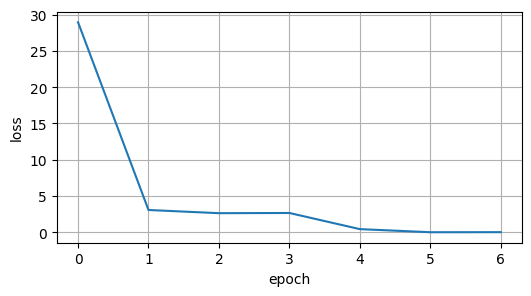

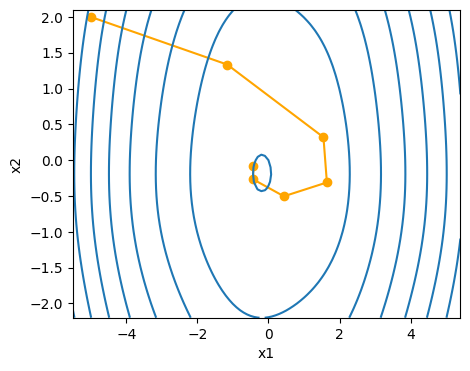

In [7]:
train_mom(6, 0.8, 0.5, -5, 2)

In [8]:
# RMEPrep
# 让不同参数之间的梯度差距不要太大

def train_rme(num_epochs, lr, belta, x1, x2):
    losses = [loss(x1, x2)]
    results = [(x1, x2)]
    s1, s2 = 0.0, 0.0
    epsilon = 1e-8
    for epoch in range(num_epochs):
        g1, g2 = grad(x1, x2)
        s1 = belta * s1 + (1 - belta) * g1**2
        s2 = belta * s2 + (1 - belta) * g2**2
        x1 -= lr * g1 / (math.sqrt(s1) + epsilon)
        x2 -= lr * g2 / (math.sqrt(s2) + epsilon)
        losses.append(loss(x1, x2))
        results.append((x1, x2))
    
    print(f'epoch {epoch + 1:d}, loss {losses[-1]:.3f}, x1 {x1:.3f}, x2 {x2:.3f}')
    ax = build_ax('epoch', 'loss')
    ax.plot(range(num_epochs + 1), losses)
    show_trace_2d(results, loss)


epoch 6, loss -0.064, x1 -0.148, x2 -0.088


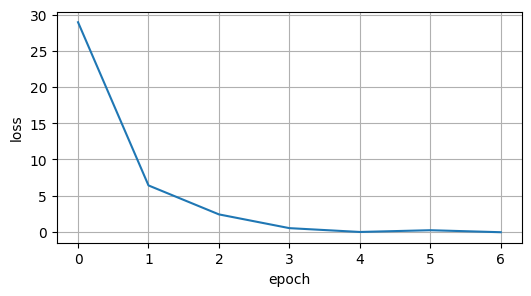

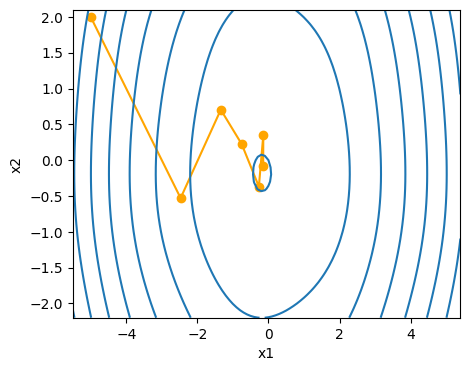

In [9]:
train_rme(6, 0.8, 0.9, -5, 2)

In [12]:
# Adam
# 结合了Momentum和RMSProp

def train_adam(num_epochs, lr, belta1, belta2, x1, x2):
    losses = [loss(x1, x2)]
    results = [(x1, x2)]
    v1, v2, s1, s2 = 0.0, 0.0, 0.0, 0.0
    belta1t, belta2t = 1, 1
    epsilon = 1e-8
    for epoch in range(num_epochs):
        g1, g2 = grad(x1, x2)
        v1 = belta1 * v1 + (1 - belta1) * g1
        v2 = belta1 * v2 + (1 - belta1) * g2
        s1 = belta2 * s1 + (1 - belta2) * g1**2
        s2 = belta2 * s2 + (1 - belta2) * g2**2
        belta1t *= belta1
        belta2t *= belta2
        v1 = v1 / (1 - belta1t)
        v2 = v2 / (1 - belta1t)
        s1 = s1 / (1 - belta2t)
        s2 = s2 / (1 - belta2t)
        x1 -= lr * v1 / (math.sqrt(s1) + epsilon)
        x2 -= lr * v2 / (math.sqrt(s2) + epsilon)
        losses.append(loss(x1, x2))
        results.append((x1, x2))
    
    print(f'epoch {epoch + 1:d}, loss {losses[-1]:.3f}, x1 {x1:.3f}, x2 {x2:.3f}')
    ax = build_ax('epoch', 'loss')
    ax.plot(range(num_epochs + 1), losses)
    show_trace_2d(results, loss)
        

epoch 6, loss -0.010, x1 -0.038, x2 0.009


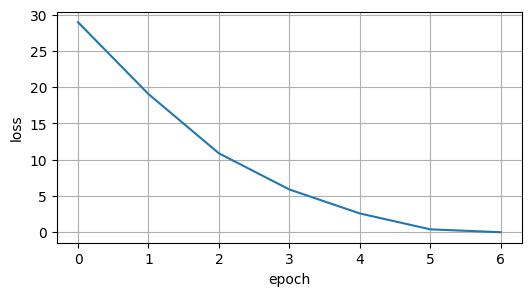

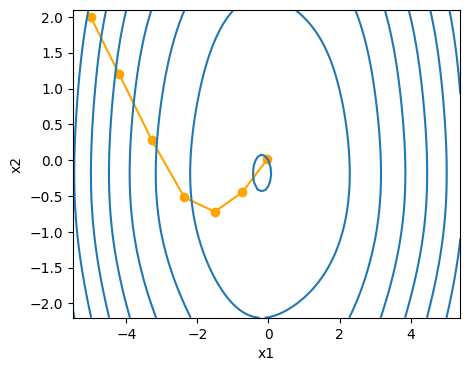

In [ ]:
train_adam(6, 0.8, 0.5, 0.5, -5, 2)

In [34]:
# Learning rate decay
# 梯度下降过程中慢慢减小学习率

def train_lrd(num_epochs, lr, decay_rate, x1, x2):
    losses = [loss(x1, x2)]
    results = [(x1, x2)]
    for epoch in range(num_epochs):
        g1, g2 = grad(x1, x2)
        x1 -= lr / (1 + decay_rate * epoch) * g1
        x2 -= lr / (1 + decay_rate * epoch) * g2
        results.append((x1, x2))
        losses.append(loss(x1,x2))
    
    print(f'epoch {epoch + 1:d}, loss {losses[-1]:.3f}, x1 {x1:.3f}, x2 {x2:.3f}')
    ax = build_ax('epoch', 'loss')
    ax.plot(range(num_epochs + 1), losses)
    show_trace_2d(results, loss)

epoch 6, loss -0.065, x1 -0.156, x2 -0.092


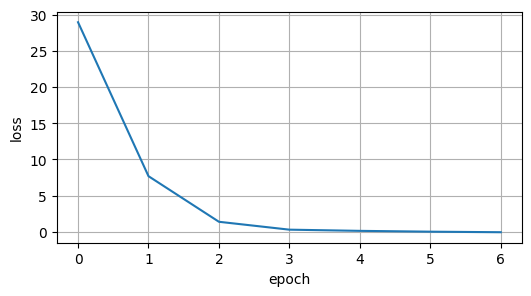

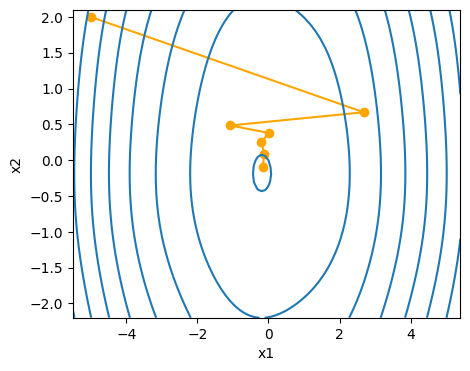

In [38]:
train_lrd(6, 0.8, 0.2, -5, 2)